<a href="https://colab.research.google.com/github/appy09/INT524Assignment/blob/master/BinaryClassification_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)



parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import numpy as np
import pandas as pd


loading data from drive

In [2]:
train=pd.read_csv("/content/drive/MyDrive/Dataset/titanic/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Dataset/titanic/test.csv")
target=pd.read_csv("/content/drive/MyDrive/Dataset/titanic/gender_submission.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


removing unwanted columns

In [7]:
train=train.drop(['PassengerId', 'Name', 'Cabin','Ticket'], axis=1)
test=test.drop(['PassengerId', 'Name', 'Cabin','Ticket'], axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder
sexLabel = LabelEncoder()
train['Sex'] = sexLabel.fit_transform(train['Sex'].values)
train['Sex']


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [9]:
test['Sex'] = sexLabel.fit_transform(test['Sex'].values)
test['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [10]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [26]:
m=train['Age'].mean()
train['Age']=train['Age'].replace(np.nan,m)
m=test['Age'].mean()
test['Age']=test['Age'].replace(np.nan,m)
m=test['Fare'].mean()
test['Fare']=test['Fare'].replace(np.nan,m)

In [11]:
train['Embarked'].values

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', nan, 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S

In [12]:
train['Embarked']=train['Embarked'].replace(np.nan,'S')
test['Embarked']=test['Embarked'].replace(np.nan,'S')

In [13]:
EmbarkedLabel = LabelEncoder()
train['Embarked'] = EmbarkedLabel.fit_transform(train['Embarked'].values)
train['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [14]:
test['Embarked'] = EmbarkedLabel.fit_transform(test['Embarked'].values)
test['Embarked']

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64

In [15]:
SurvivedX=train['Survived']
SurvivedX

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
SurvivedY=target['Survived']
SurvivedY

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

Correlation matrix

In [17]:
corr_mat =train.corr()
corr_mat['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [18]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

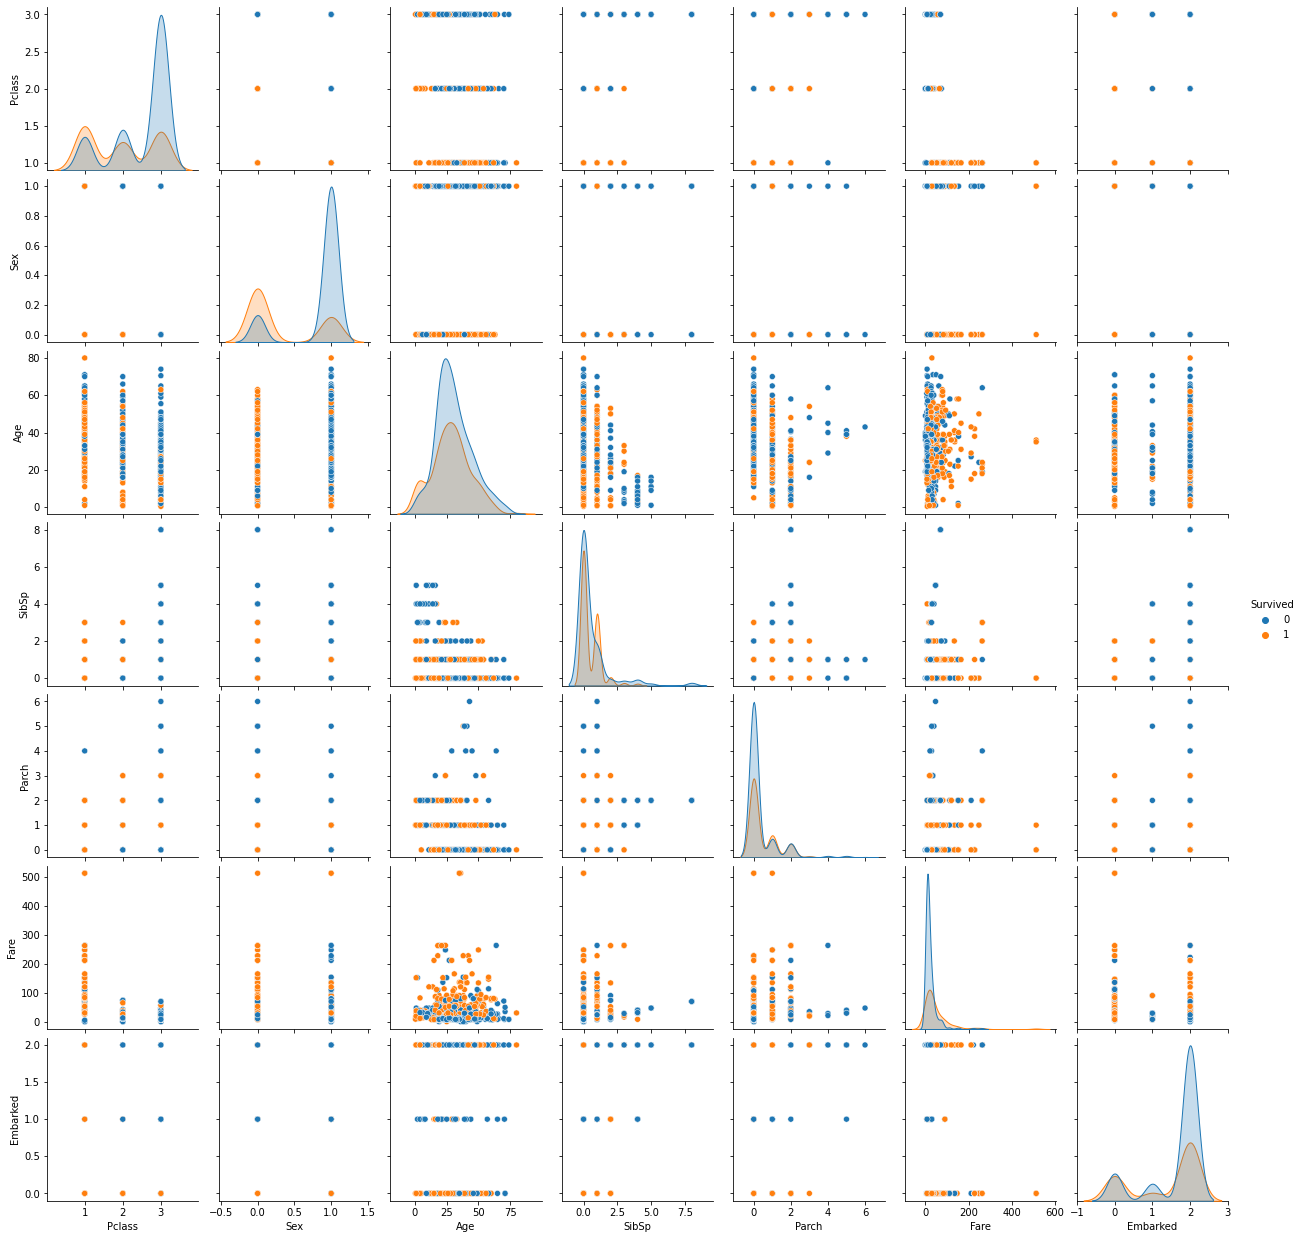

In [19]:
sns.pairplot(train,hue='Survived')

In [20]:
train=train.drop(['Survived'],axis=1)
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,NaN,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [21]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


Guassion Naive Bayes Classification

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
yPred_gnb=gnb.fit(train,SurvivedX).predict(test)

In [37]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix

In [38]:
cvs_gnb = cross_val_score(gnb,train,SurvivedX,cv=3)
cvs_gnb

array([0.76430976, 0.78787879, 0.8013468 ])

In [39]:
cvp_gnb = cross_val_predict(gnb,train,SurvivedX,cv=3)
cvp_gnb

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

Manual Calculation of Precision, Recall, F1 Score

Here
cfm_gnb: Confusion Matrix

TN (True Negative): cfm_gnb[0][0]

FN (False Negative): cfm_gnb[1][0]

FP (False Positive): cfm_gnb[0][1]

TP (True Positive): cfm_gnb[1][1]

Precision= TP/ (TP+FP)

Recall= TP / (TP+FN)

F1 Score= 2* (Precision * Recall) / (Precision + Recall)

In [47]:
cfm_gnb=confusion_matrix(SurvivedX,cvp_gnb)
print("Confusion Matrix: ", cfm_gnb)
prec_gnb=cfm_gnb[1][1]/(cfm_gnb[1][1]+cfm_gnb[0][1])
recall_gnb=cfm_gnb[1][1]/(cfm_gnb[1][1]+cfm_gnb[1][0])
print("Precision: ",prec_gnb)
print("Recall: ",recall_gnb)
f1_gnb= 2 * (prec_gnb*recall_gnb) / (prec_gnb + recall_gnb)
print("F1 score:", f1_gnb)

Confusion Matrix:  [[454  95]
 [ 97 245]]
Precision:  0.7205882352941176
Recall:  0.716374269005848
F1 score: 0.7184750733137829
